In [36]:
import tdt
import numpy as np
import matplotlib.pyplot as plt

In [37]:
folder = 'R:\\DA_and_Reward\\kp259\\THPH2\Tanks\\'
file = 'R:\\DA_and_Reward\\fn55\\dPPP1-190322-093722\\Fabien-190329-101733'
file = 'R:\\DA_and_Reward\\es334\\PPP1\\tdtfiles\\Eelke-171103-094134'

file = folder + 'Kate-170810-072909'

box=1

In [38]:
tmp = tdt.read_block(file, evtype=['epocs'])

read from t=0s to t=3706.76s


In [39]:
tmp.epocs

Tick	[struct]
Cam2	[struct]
Cam1	[struct]
Senx	[struct]
Se2x	[struct]
La2x	[struct]
Di2x	[struct]
Do2x	[struct]
LiAx	[struct]
Didx	[struct]
Disx	[struct]

In [41]:
# For Box 1
if box==1:
    Lick = 'LiA_'
    Distractor = 'Did_'
    Distracted = 'Dis_'

    SigBlue = 'Dv1B'
    SigUV = 'Dv2B'
else:
# For Box 2
    Lick = 'La2_'
    Distractor = 'Di2_'
    Distracted = 'Do2_'

    SigBlue = 'Dv3B'
    SigUV = 'Dv4B'

In [42]:
tmp = tdt.read_block(file, evtype=['streams'], store=[SigBlue])
data = getattr(tmp.streams, SigBlue)['data']
fs = getattr(tmp.streams, SigBlue)['fs']

tmp = tdt.read_block(file, evtype=['streams'], store=[SigUV])
dataUV = getattr(tmp.streams, SigUV)['data']

ttls = tdt.read_block(file, evtype=['epocs']).epocs

read from t=0s to t=3706.76s
read from t=0s to t=3706.76s
read from t=0s to t=3706.76s


In [60]:
# Matlab code

# function [data] = FPfftfilt(data)
# % First load all your data files into a structure of data(idx).__ where
# % data(idx).sig is the 465nm signal and data(idx).baq is the 405nm signal
# % and idx = number of data files to be processed

# [c,d]=butter(9,0.012,'low');
#     for idx = 1:size(data,2)
#         pt = length(data(idx).blue); %length of data
#         X = fft(data(idx).uv,pt); %405nm signal in freq domain
#         Y = fft(data(idx).blue,pt); %465nm signal in freq domain
#         Ynet = Y-X; %freq domain subtraction
#         data(idx).bluefilt = detrend(double(real(ifft((Ynet))))); %inverse of real conjugates of fft to get back time domain of 465nm
#         data(idx).uvfilt = detrend(double(real(ifft(X)))); %inverse of real conjugates of fft to get back time domain of 405nm
#         data(idx).bluefilt = filtfilt(c,d,data(idx).bluefilt); %apply lowpass filter to get rid of high freq noise added by the subtraction
#     end
# end



import scipy.signal as sig


pt = len(data)
X = np.fft.rfft(dataUV, pt)
Y = np.fft.rfft(data, pt)
Ynet = Y-X
datafilt = np.fft.irfft(Ynet)

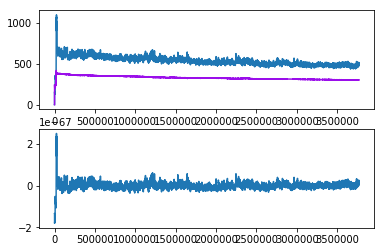

In [62]:
datafilt = sig.detrend(datafilt)

b, a = sig.butter(9, 0.012, 'low', analog=True)
datafilt = sig.filtfilt(b, a, datafilt)



f, ax = plt.subplots(nrows=2)
ax[0].plot(data)
ax[0].plot(dataUV, c='xkcd:violet')

ax[1].plot(datafilt)

In [ ]:
#Function FFT and frequencies
def pw(A,fs):
   pw=abs(rfft(A))**2
   print(len(pw))
   if len(pw)%2!=0:tidypw=pw[1:].reshape(-1,len(pw)/(fs)).sum(axis=1)
   else:tidypw=pw.reshape(-1,len(pw)/(fs)).sum(axis=1)
   print(len(tidypw))
   return  tidypw.tolist()


Send a message



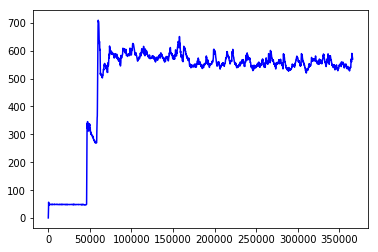

In [4]:
fig, ax = plt.subplots()

ax.plot(data.streams.Dv1B['data'], c='b')

In [16]:
raw = data.streams.Fi2r.data[5]
sig470 = data.streams.Fi2r.data[1]

In [17]:
np.shape(raw.data)

(2197266,)

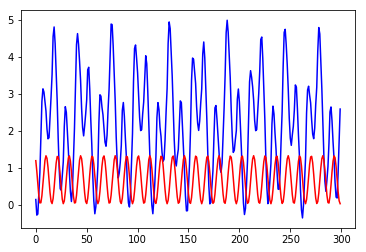

In [22]:
fig, ax = plt.subplots()

ax.plot(raw[1000000:1000300], c='b')
ax.plot(sig470[1000000:1000300], c='r')